## Importing the required packages 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# importing the warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [2]:
# To read the csv file
df = pd.read_csv('data.csv')
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [3]:
# to print information
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

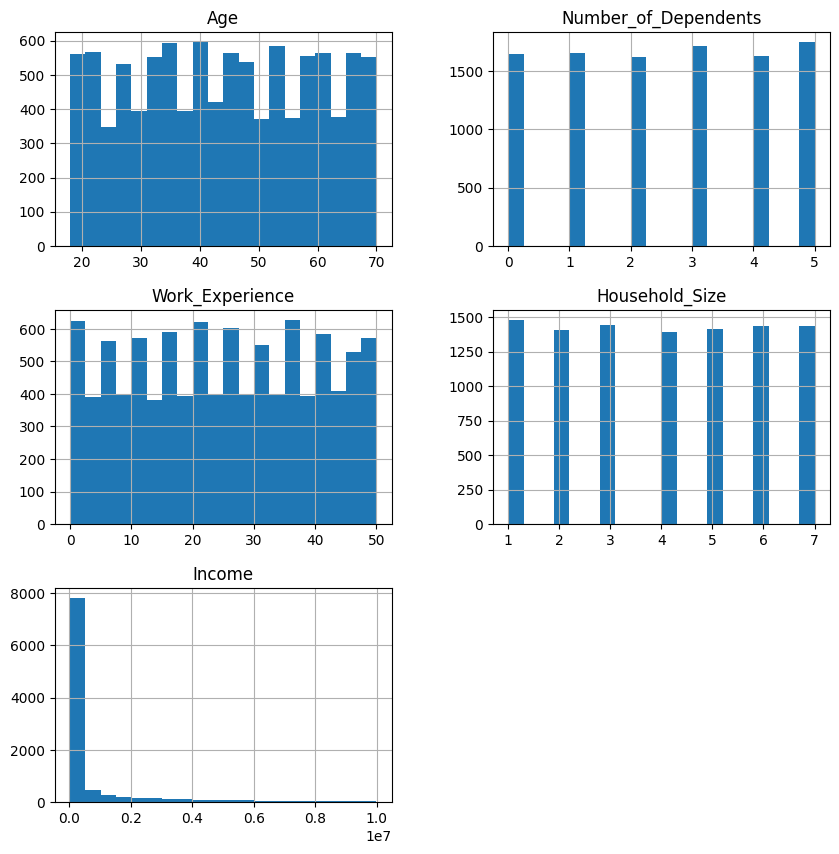

In [4]:
# Histograms for numerical data
df.hist(bins=20, figsize=(10, 10))
plt.show()

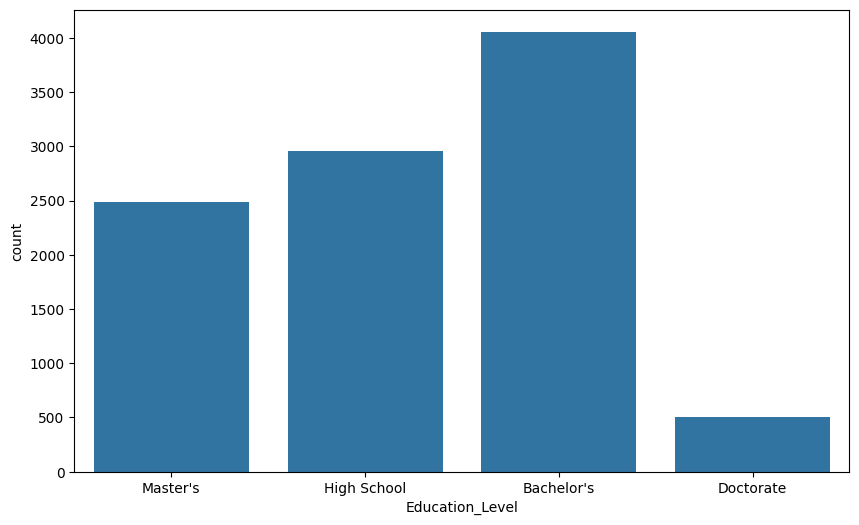

In [5]:
# Bar plots for categorical data
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', data=df)
plt.show()

# plt.figure(figsize=(10, 6))
# sns.countplot(x='Type_of_Housing', data=df)
# plt.show()


# LabelEncoder 

Label encoding is a technique used in machine learning and data preprocessing to convert categorical data into numerical values. 


In [6]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# # Apply LabelEncoder to categorical columns
# df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
# df['Employment Status'] = label_encoder.fit_transform(df['Employment Status'])
# df['Region'] = label_encoder.fit_transform(df['Region'])
# df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

# List of categorical columns to encode
categorical_columns = ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# print(df.head())

In [7]:
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,3,4,5,2,21,1,0,7,0,0,1,2,72510
1,69,2,1,0,2,4,2,0,7,0,0,1,0,75462
2,46,0,4,1,2,1,2,0,7,0,1,0,1,71748
3,32,2,3,2,2,32,1,0,1,0,0,0,1,74520
4,60,0,1,3,2,15,1,2,4,0,2,1,3,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,2,3,0,1,26,0,0,6,0,2,0,1,74994
9996,23,3,4,3,2,16,0,0,1,0,1,0,0,72676
9997,41,1,0,3,2,50,2,0,4,0,1,0,2,2684820
9998,44,2,0,0,2,3,1,1,1,0,1,1,0,57955


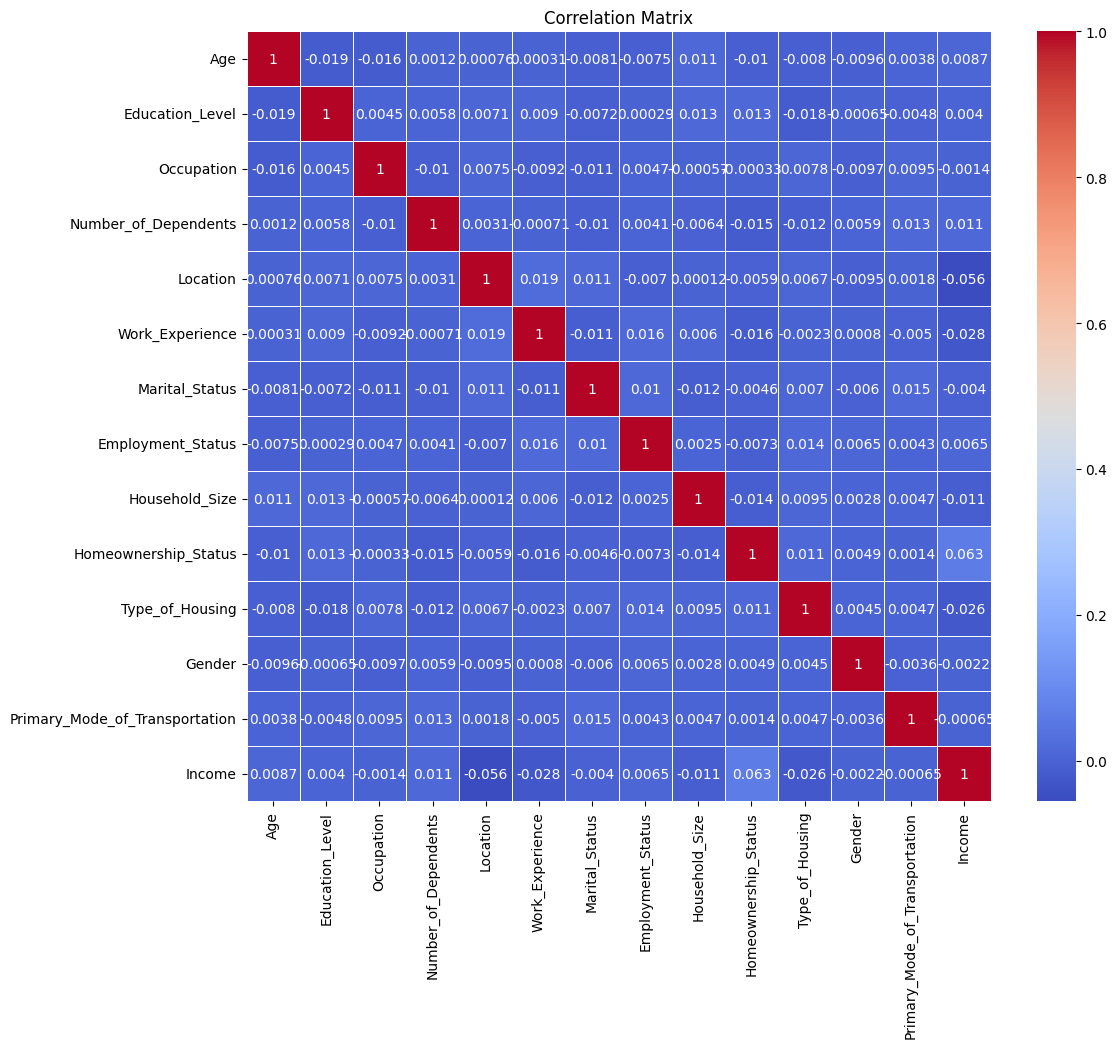

In [8]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Checking on the outliers

In [9]:
# Compute Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)

# Identify outliers
outliers = (abs_z_scores > 3).all(axis=1)
outlier_rows = df[outliers]

In [10]:
outliers.unique()

array([False])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             10000 non-null  int64
 1   Education_Level                 10000 non-null  int32
 2   Occupation                      10000 non-null  int32
 3   Number_of_Dependents            10000 non-null  int64
 4   Location                        10000 non-null  int32
 5   Work_Experience                 10000 non-null  int64
 6   Marital_Status                  10000 non-null  int32
 7   Employment_Status               10000 non-null  int32
 8   Household_Size                  10000 non-null  int64
 9   Homeownership_Status            10000 non-null  int32
 10  Type_of_Housing                 10000 non-null  int32
 11  Gender                          10000 non-null  int32
 12  Primary_Mode_of_Transportation  10000 non-null  int32
 13  In

# Split of the dataset 

In [12]:
# Assuming 'Income' is the target variable
X = df.drop('Income', axis=1)
y = df['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model training,

Linear Regression: 
Linear regression is a fundamental statistical and machine learning technique used to model the relationship between a dependent variable and one or more independent variables. 

SVR:
SVR usually stands for Support Vector Regression, which is a type of machine learning algorithm used for regression tasks. 
It’s part of the support vector machine (SVM) family, and it aims to predict a continuous output based on input features.

Decision tree regressor:
A Decision Tree Regressor is a type of machine learning model used for predicting continuous values.

Random Forest Regressor:
A Random Forest Regressor is a machine learning model used for regression tasks. 
It is an ensemble method that combines multiple decision trees to improve prediction accuracy and control overfitting.

Ridge Regression:
Ridge regression, also known as Tikhonov regularization, is a technique used in linear regression to address some of the problems that can arise when dealing with multicollinearity or when the number of features is larger than the number of observations.

Ridge regression modifies the standard linear regression approach by adding a penalty term to the loss function.
This penalty term helps to constrain the size of the coefficients, which can lead to a more robust model.

Ridge regression is a valuable tool in your machine learning toolkit, especially when you need to handle issues related to multicollinearity or when working with a large number of predictors.

Lasso Regression:
Lasso regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that incorporates regularization to improve model performance and interpretability. 
Lasso regression is a powerful tool in the data scientist’s toolkit, particularly when dealing with complex datasets and aiming for models that balance accuracy and interpretability.

# Plot of Actual vs Predicted Values 
The scatter plot you generate with this code will visually compare the actual values against the predicted values from your regression model.
Ideally, if your model performs perfectly, all points will lie on the dashed red line (which represents perfect prediction). 
Deviations from this line indicate the extent of prediction errors. 
The plot helps in visually assessing the performance of your model: points closely following the line suggest a better fit, while significant deviations suggest areas where the model may need improvement.

# Plot Q-Q Plot
The Q-Q plot is a useful diagnostic tool to validate assumptions about the residuals of a model, helping to ensure the robustness of the regression analysis.

# Feature Importance
Gives visualization will help you gain insights into the relative importance of features, aiding in model evaluation and improvement.



# Low MSE/RMSE: Indicates that the model’s predictions are close to the actual values.
# Low MAE: Suggests that the average prediction error is low, but is less sensitive to large errors than MSE.
# High R²: Indicates that a large proportion of the variance in the target variable is explained by the model.

Linear Regression Metrics:
  MSE: 3146273932318.602
  RMSE: 1773773.9236775925
  MAE: 1105080.9813969913
  R^2: 0.0027222467799985495
------------------------------


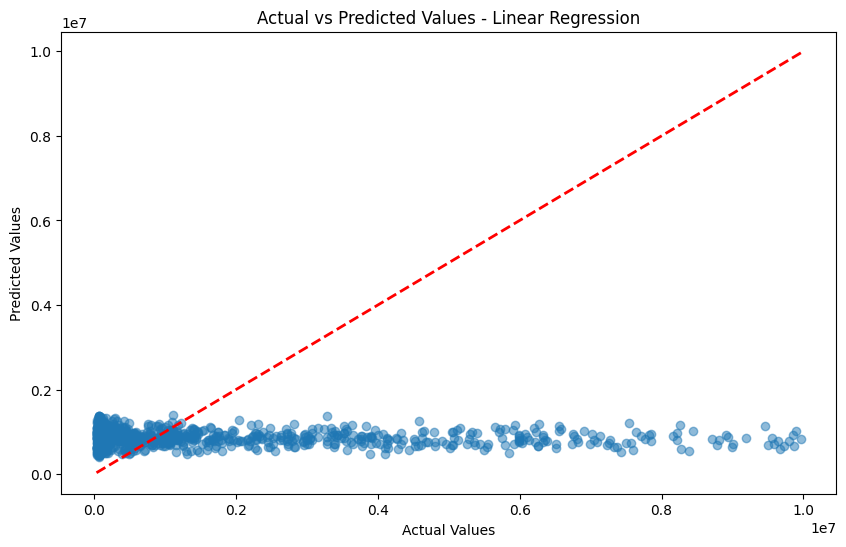

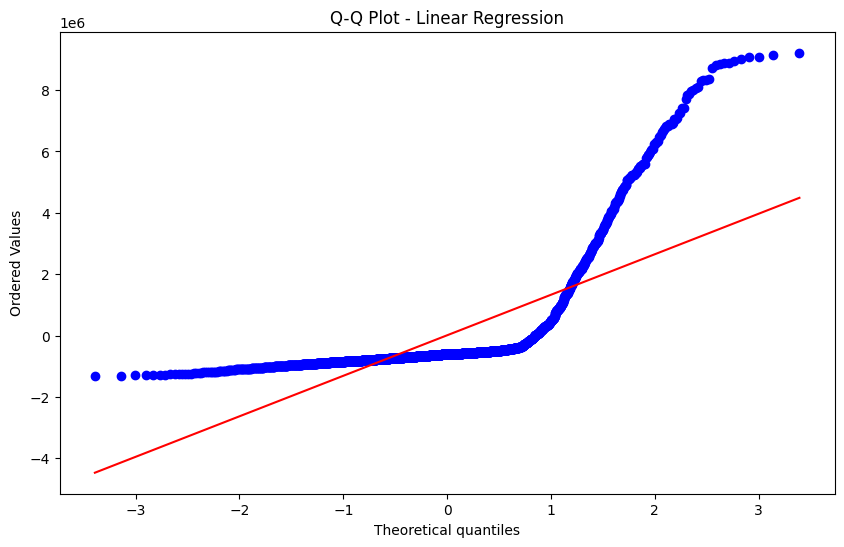

SVR Metrics:
  MSE: 3714665582796.758
  RMSE: 1927346.7728451872
  MAE: 754281.9291937681
  R^2: -0.1774414517191134
------------------------------


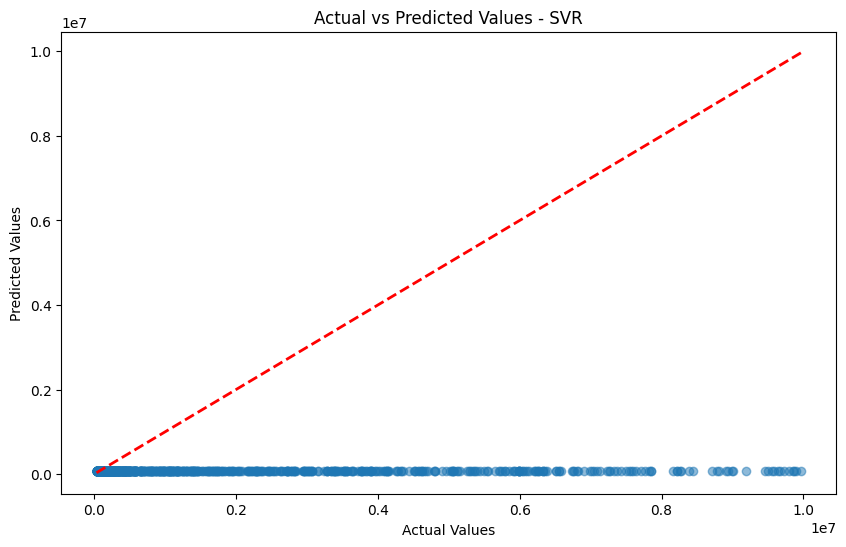

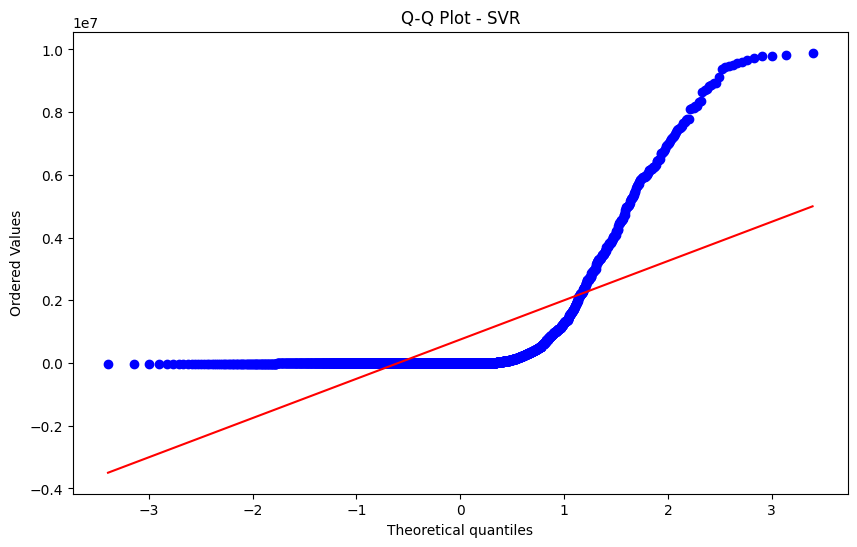

Decision Tree Regressor Metrics:
  MSE: 7383336917988.651
  RMSE: 2717229.640274935
  MAE: 1416240.008
  R^2: -1.3403040584618702
------------------------------


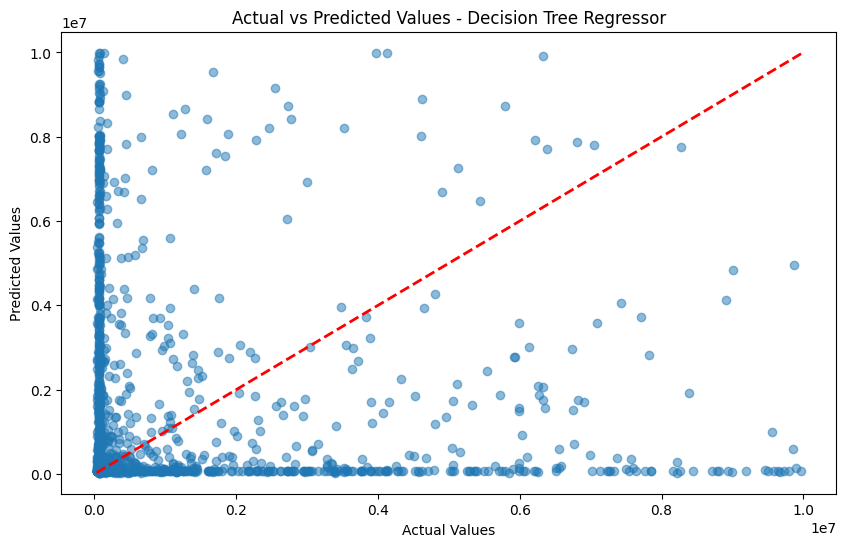

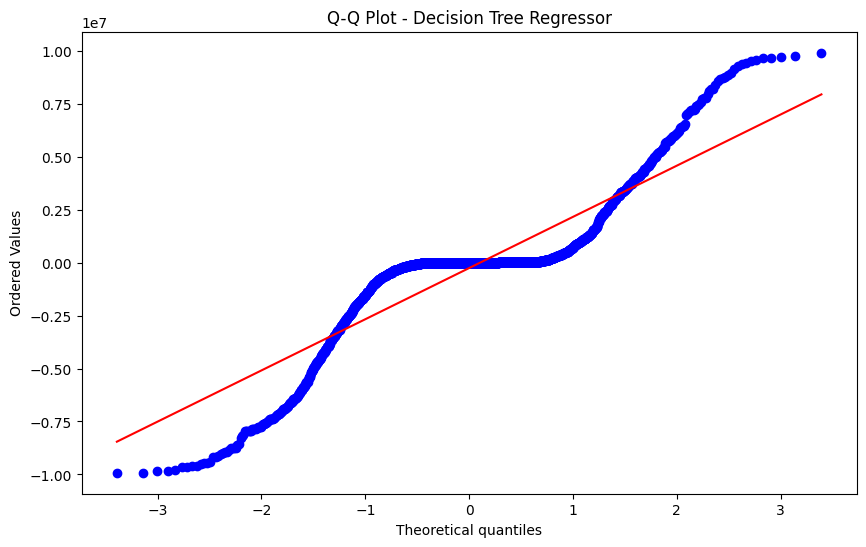

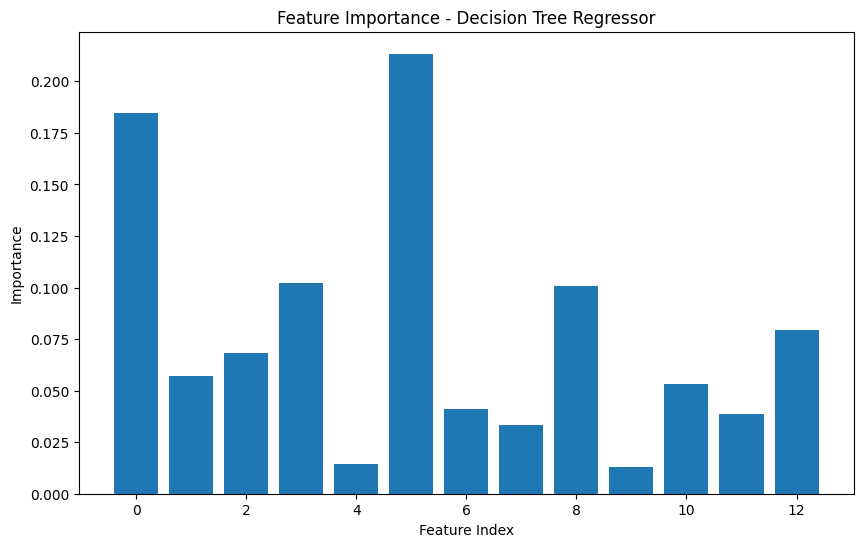

Random Forest Regressor Metrics:
  MSE: 3227691260389.94
  RMSE: 1796577.652201524
  MAE: 1194821.862
  R^2: -0.0230846892207468
------------------------------


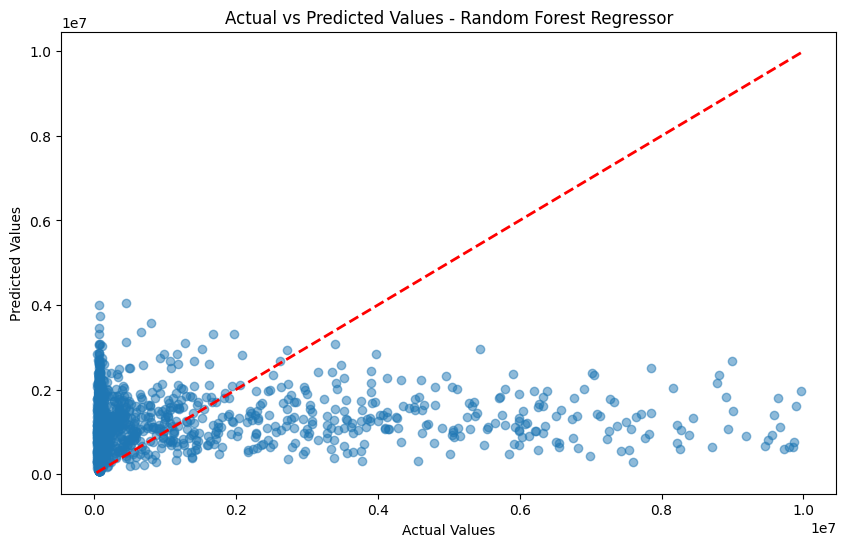

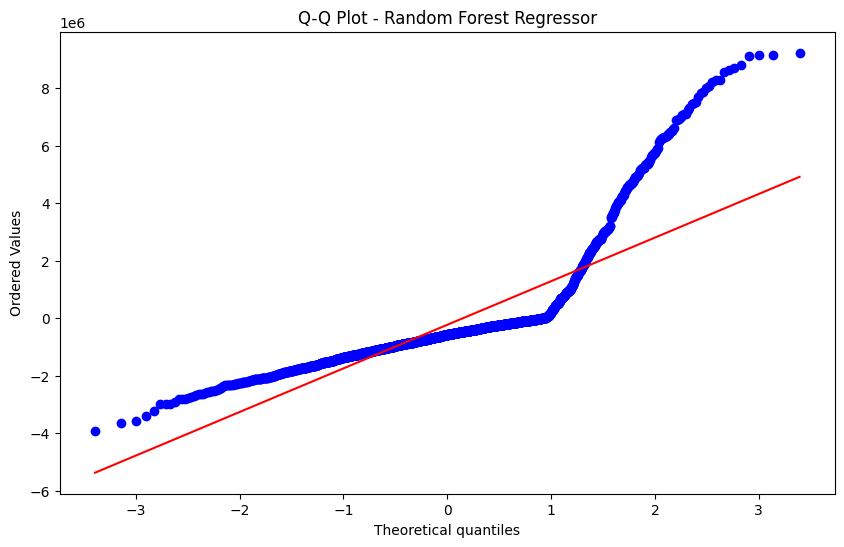

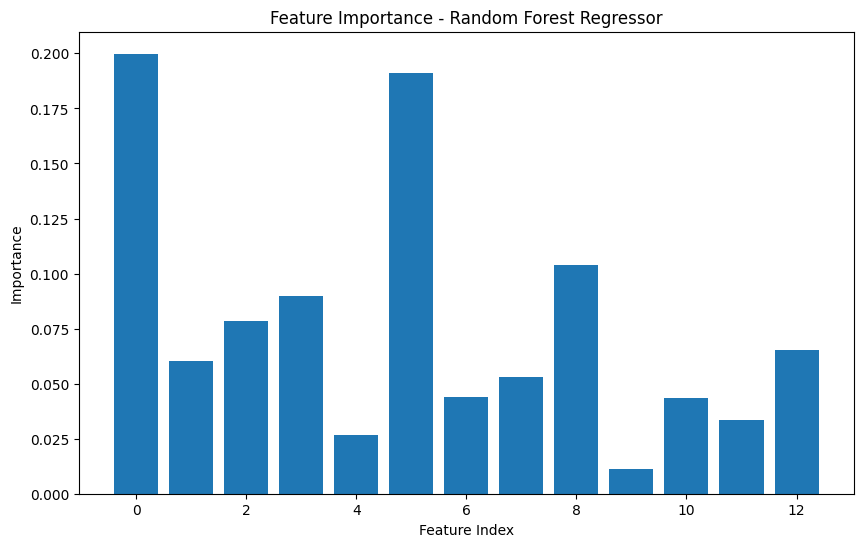

Ridge Regression Metrics:
  MSE: 3146269094301.945
  RMSE: 1773772.5599134588
  MAE: 1105084.9428144952
  R^2: 0.0027237802912202236
------------------------------


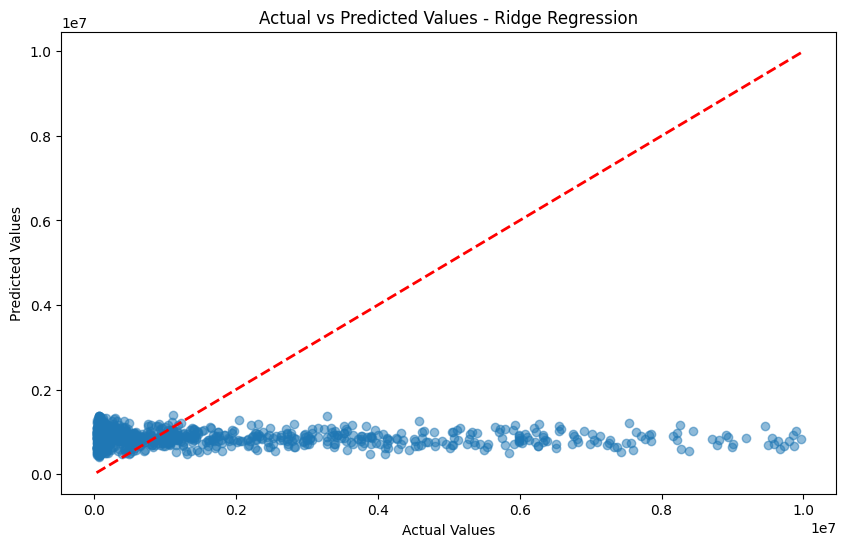

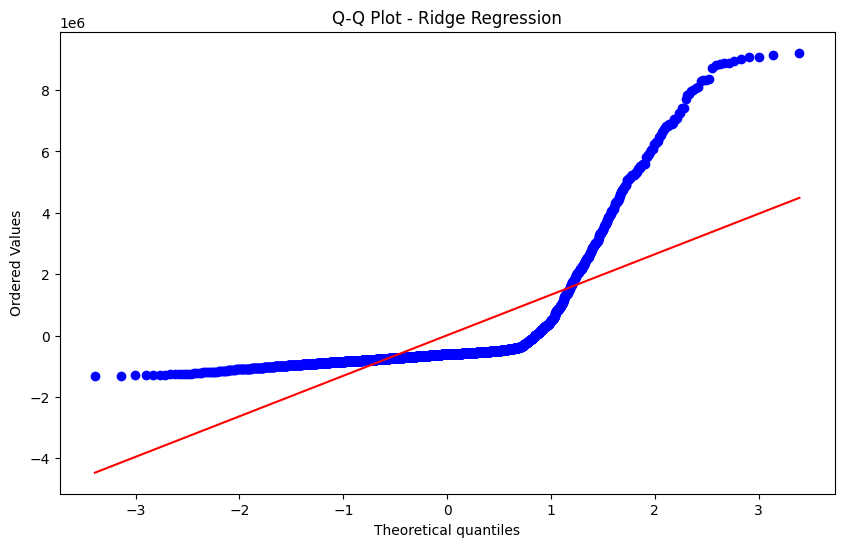

Lasso Regression Metrics:
  MSE: 3146273359331.2085
  RMSE: 1773773.7621611187
  MAE: 1105081.085624785
  R^2: 0.0027224284004145893
------------------------------


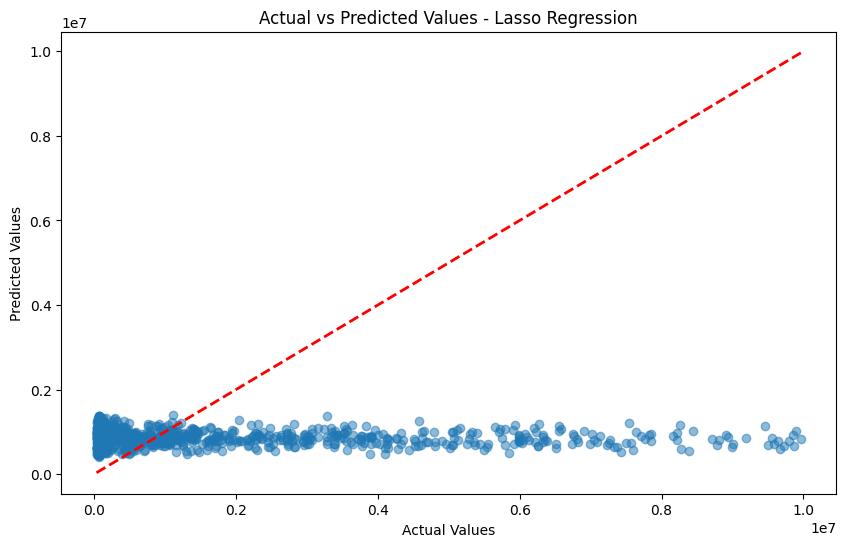

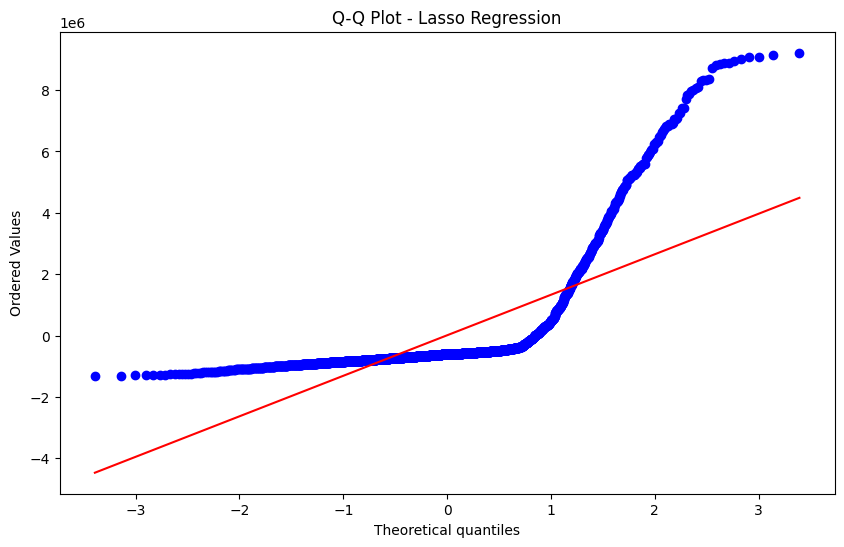

In [13]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name} Metrics:')
    print(f'  MSE: {mse}')
    print(f'  RMSE: {rmse}')
    print(f'  MAE: {mae}')
    print(f'  R^2: {r2}')
    print('-' * 30)

     # Plot Actual vs Predicted Values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted Values - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    # Plot Q-Q Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - {name}')
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
        plt.title(f'Feature Importance - {name}')
        plt.xlabel('Feature Index')
        plt.ylabel('Importance')
        plt.show()

# Cross validation
Cross-validation is a technique used in machine learning to evaluate the performance of a model and ensure that it generalizes well to unseen data. 
Cross-validation provides a robust measure of model performance by splitting the data into multiple training and testing sets and averaging the results. 

In [14]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    rmse_scores = np.sqrt(mse_scores)
    mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores
    
    print(f'{name} Cross-Validation Metrics:')
    print(f'  Mean MSE: {mse_scores.mean()}')
    print(f'  Mean RMSE: {rmse_scores.mean()}')
    print(f'  Mean MAE: {mae_scores.mean()}')
    print('-' * 30)


Linear Regression Cross-Validation Metrics:
  Mean MSE: 3296534021770.21
  Mean RMSE: 1815259.6457439095
  Mean MAE: 1118319.4880380537
------------------------------
SVR Cross-Validation Metrics:
  Mean MSE: 3869415205118.339
  Mean RMSE: 1966650.5715092171
  Mean MAE: 750257.770918932
------------------------------
Decision Tree Regressor Cross-Validation Metrics:
  Mean MSE: 7020930523822.447
  Mean RMSE: 2649435.648377268
  Mean MAE: 1311867.3865999999
------------------------------
Random Forest Regressor Cross-Validation Metrics:
  Mean MSE: 3293448933624.1367
  Mean RMSE: 1814607.943084058
  Mean MAE: 1179729.308434
------------------------------
Ridge Regression Cross-Validation Metrics:
  Mean MSE: 3296532098933.5513
  Mean RMSE: 1815259.114615981
  Mean MAE: 1118324.0411405687
------------------------------
Lasso Regression Cross-Validation Metrics:
  Mean MSE: 3296533658319.5483
  Mean RMSE: 1815259.545195048
  Mean MAE: 1118319.645857475
------------------------------


# Learning curve 
A learning curve is a graphical representation that shows how a model's performance changes with varying amounts of training data. 
It's a valuable tool for diagnosing model performance, identifying underfitting or overfitting, and guiding decisions on whether more data is needed.
By analyzing learning curves, you can make informed decisions about adjusting model complexity, obtaining more data, or changing model hyperparameters.

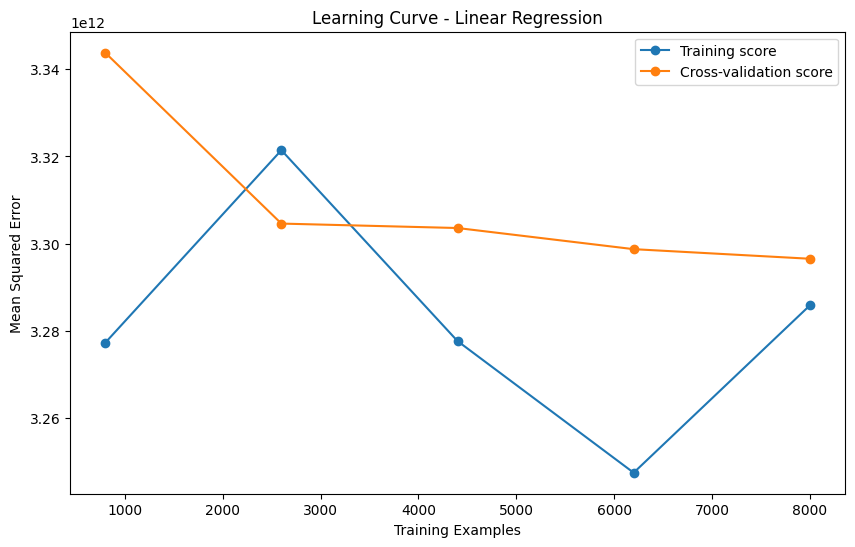

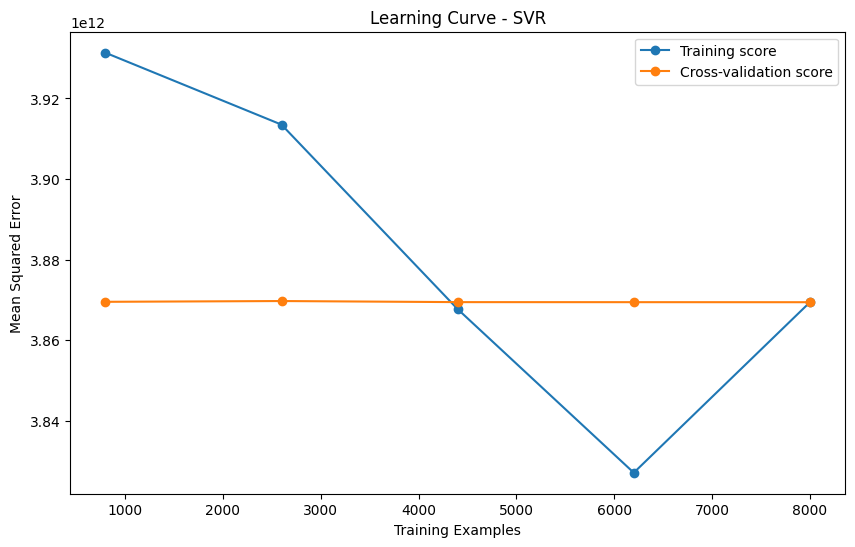

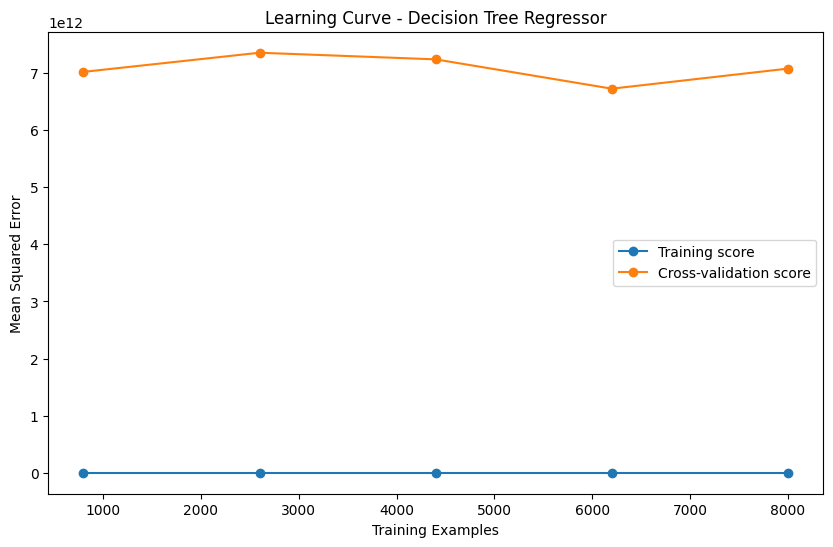

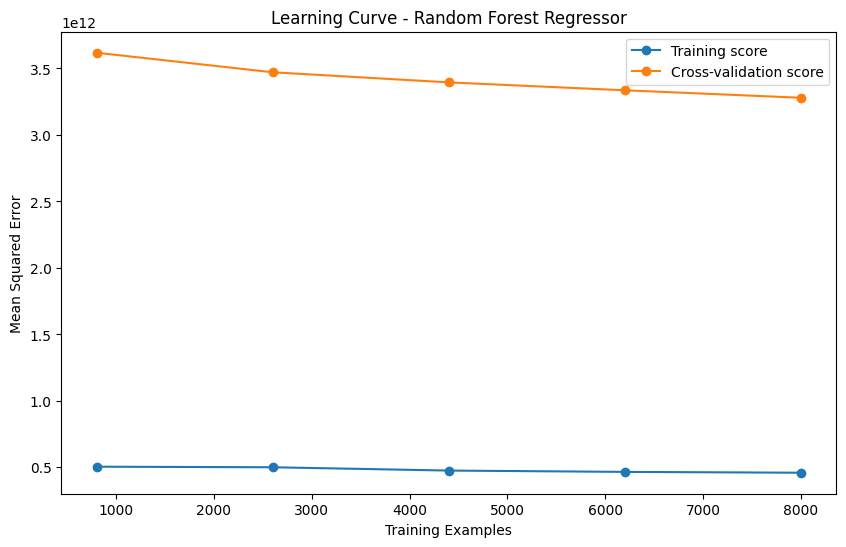

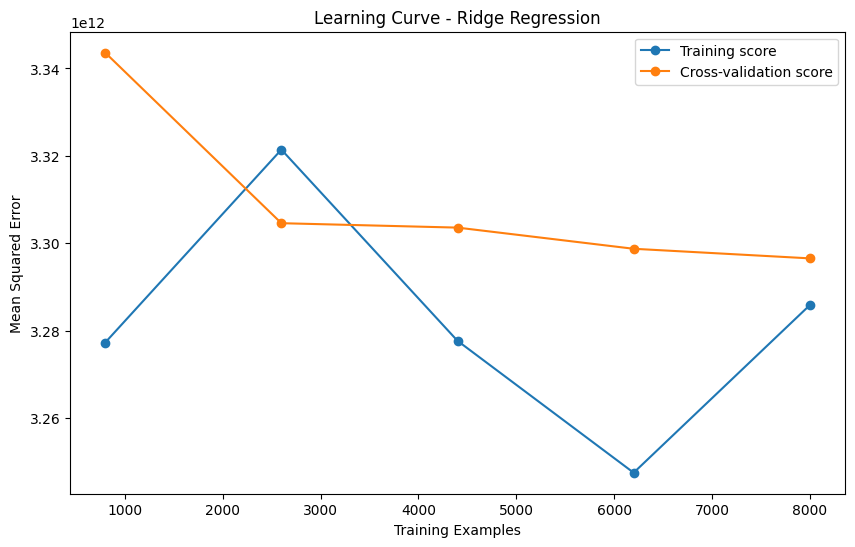

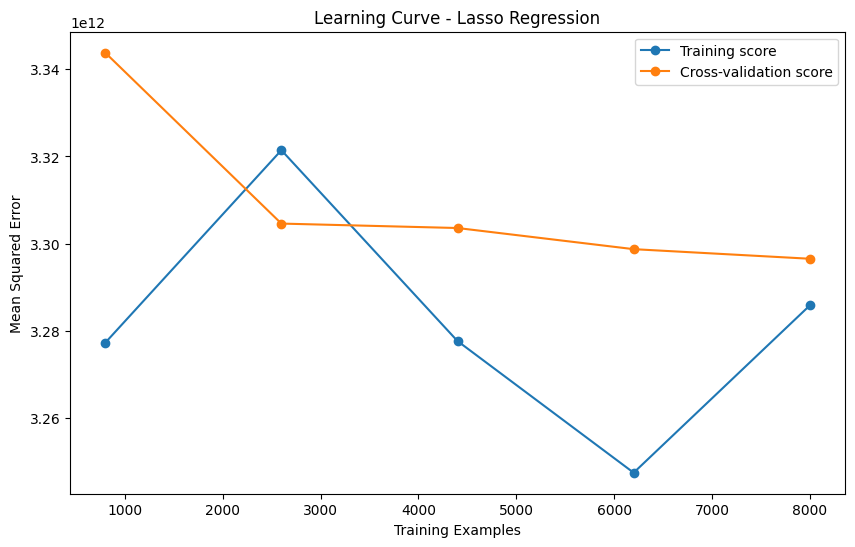

In [15]:
from sklearn.model_selection import learning_curve

for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc='best')
    plt.show()
